In [1]:
from typing import List, Callable

import numpy as np
import pandas as pd

from experiments.common import (
    run_increasing_size_neighborhoods_experiments,
)
from experiments.data.synthetic_benchmarks import benchmark_plane_1, benchmark_plane_2

%load_ext autoreload
%autoreload 2

# Experiments in dense heteroscedastic settings with increasing window size
The following are plots and metrics for a number of experimental settings with dense 2D predictors with heteroscedastic noise comparing the proposed Robust Local Polynomial Regression with Similarity Kernels method with LOWESS, robust LOWESS, kernel regression, local polynomial and RBF network regression. The plots are interactive and allows to hide and show different elements by clicking or double-clicking as well as to zoom in on areas of interest.

In [2]:
extreme_noise_ratio: float = 0.35
high_noise_ratio: float = 0.25
medium_noise_ratio: float = 0.15
mild_noise_ratio: float = 0.05
hetero: bool = True
num_points: int = 100

bw1_f: Callable[[np.ndarray], List[float]] = (
    lambda data: [float(1 / np.clip(a=0.1 * data.shape[0], a_min=2.0, a_max=27.0))] * data.shape[1]
)

size_neighborhoods: List[int] = [5, 7, 9, 11, 13, 15] + np.linspace(
    start=20, stop=num_points, num=10, endpoint=True
).astype(int).tolist()

methods = ["rsklpr", "kernel_reg_ll", "kernel_reg_lc", "local_quad", "rbfnet"]

## Plane 1

### Mild noise

Best performing method is local_quad for size_neighborhood w_13


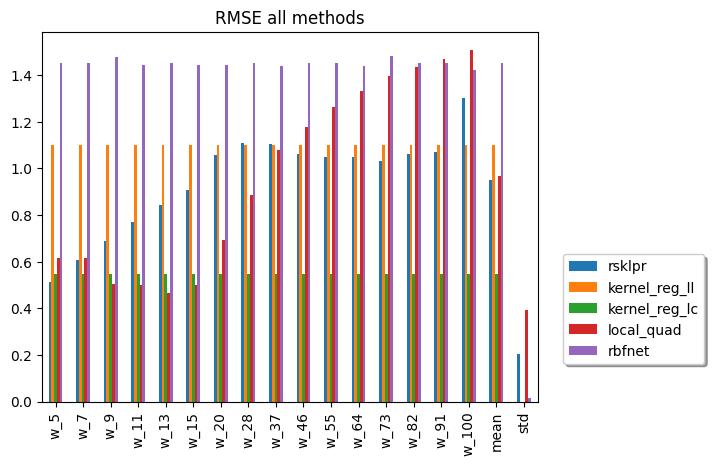

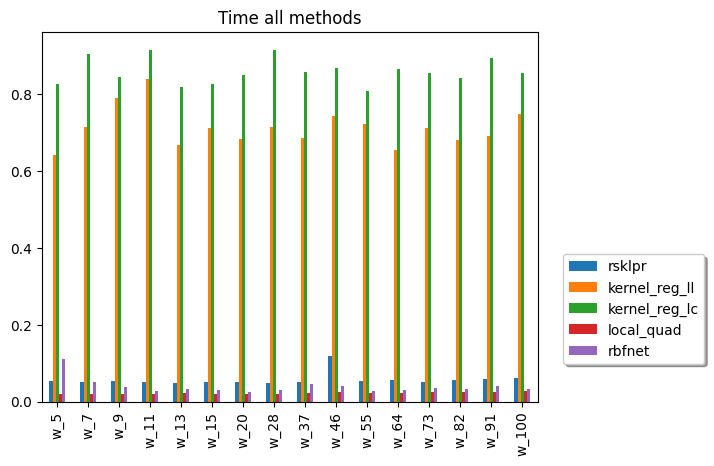

In [3]:
best_for_window: pd.DataFrame
worst_for_window: pd.DataFrame
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_1,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [4]:
best_for_window

method      rmse
w_5           rsklpr  0.513721
w_7    kernel_reg_lc  0.545006
w_9       local_quad  0.504301
w_11      local_quad  0.498716
w_13      local_quad  0.466614
w_15      local_quad  0.501936
w_20   kernel_reg_lc  0.545006
w_28   kernel_reg_lc  0.545006
w_37   kernel_reg_lc  0.545006
w_46   kernel_reg_lc  0.545006
w_55   kernel_reg_lc  0.545006
w_64   kernel_reg_lc  0.545006
w_73   kernel_reg_lc  0.545006
w_82   kernel_reg_lc  0.545006
w_91   kernel_reg_lc  0.545006
w_100  kernel_reg_lc  0.545006

In [5]:
worst_for_window

method      rmse
w_5        rbfnet  1.451604
w_7        rbfnet  1.452063
w_9        rbfnet  1.479119
w_11       rbfnet  1.444081
w_13       rbfnet  1.453248
w_15       rbfnet  1.442246
w_20       rbfnet  1.444355
w_28       rbfnet  1.451055
w_37       rbfnet  1.439464
w_46       rbfnet  1.452962
w_55       rbfnet  1.452496
w_64       rbfnet  1.440994
w_73       rbfnet  1.480952
w_82       rbfnet  1.451175
w_91   local_quad  1.467329
w_100  local_quad  1.509903

### Medium noise

Best performing method is rsklpr for size_neighborhood w_82


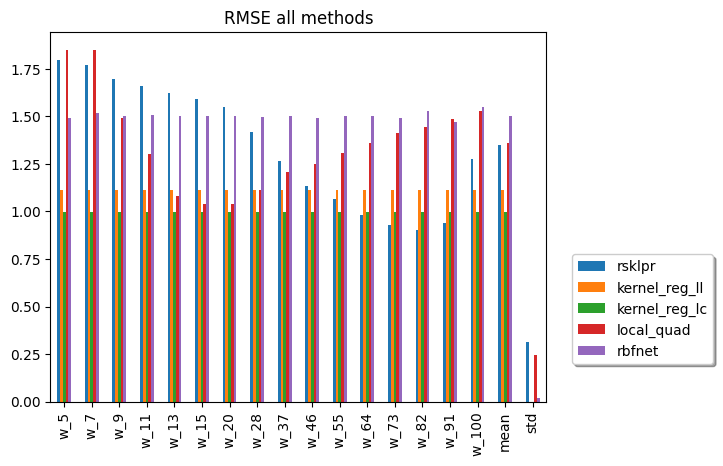

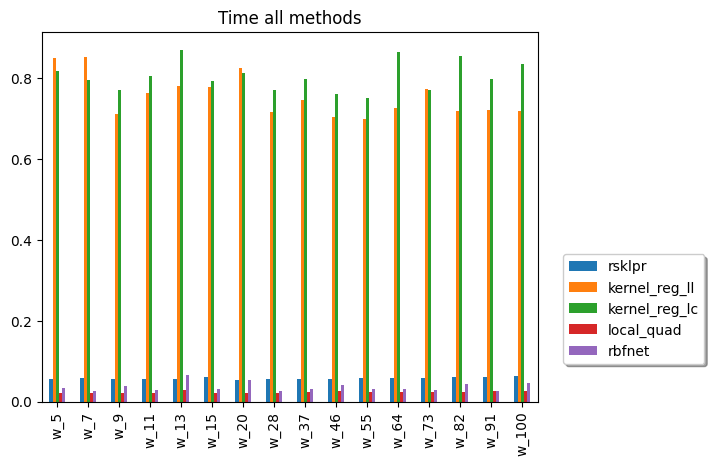

In [6]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_1,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [7]:
best_for_window

method      rmse
w_5    kernel_reg_lc  0.996675
w_7    kernel_reg_lc  0.996675
w_9    kernel_reg_lc  0.996675
w_11   kernel_reg_lc  0.996675
w_13   kernel_reg_lc  0.996675
w_15   kernel_reg_lc  0.996675
w_20   kernel_reg_lc  0.996675
w_28   kernel_reg_lc  0.996675
w_37   kernel_reg_lc  0.996675
w_46   kernel_reg_lc  0.996675
w_55   kernel_reg_lc  0.996675
w_64          rsklpr  0.981078
w_73          rsklpr  0.928017
w_82          rsklpr  0.904899
w_91          rsklpr  0.938099
w_100  kernel_reg_lc  0.996675

In [8]:
worst_for_window

method      rmse
w_5    local_quad  1.852213
w_7    local_quad  1.852213
w_9        rsklpr  1.698807
w_11       rsklpr  1.660381
w_13       rsklpr  1.622795
w_15       rsklpr  1.592411
w_20       rsklpr  1.550781
w_28       rbfnet  1.499447
w_37       rbfnet  1.500539
w_46       rbfnet  1.492083
w_55       rbfnet  1.502261
w_64       rbfnet  1.502294
w_73       rbfnet  1.494423
w_82       rbfnet  1.526156
w_91   local_quad  1.489204
w_100      rbfnet  1.552194

### High noise

Best performing method is rsklpr for size_neighborhood w_13


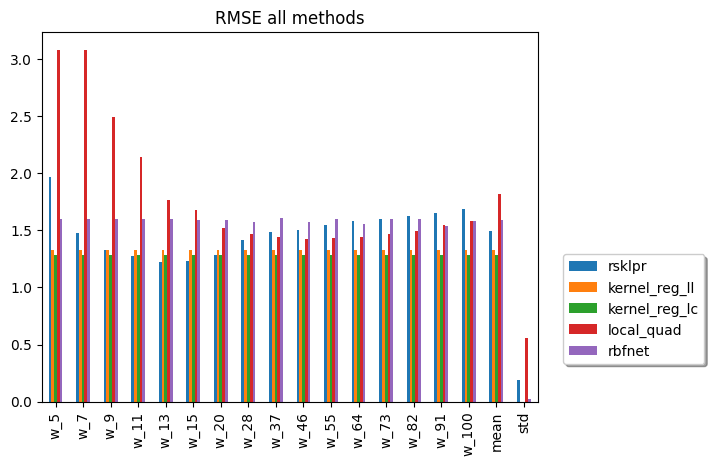

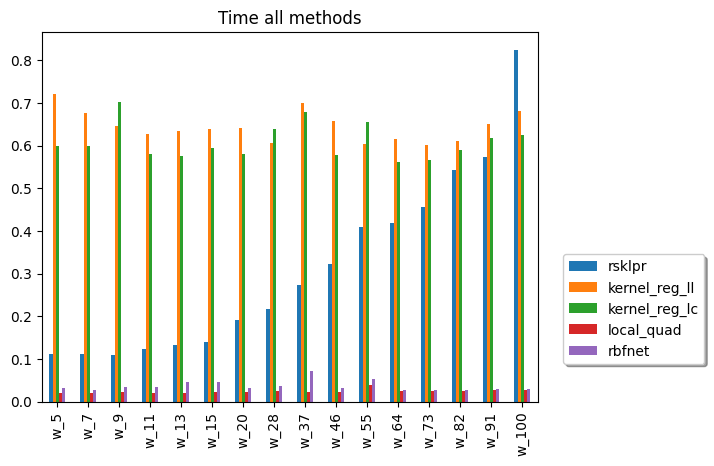

In [9]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_1,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [10]:
best_for_window

method      rmse
w_5    kernel_reg_lc  1.287850
w_7    kernel_reg_lc  1.287850
w_9    kernel_reg_lc  1.287850
w_11          rsklpr  1.276149
w_13          rsklpr  1.221060
w_15          rsklpr  1.232986
w_20          rsklpr  1.284363
w_28   kernel_reg_lc  1.287850
w_37   kernel_reg_lc  1.287850
w_46   kernel_reg_lc  1.287850
w_55   kernel_reg_lc  1.287850
w_64   kernel_reg_lc  1.287850
w_73   kernel_reg_lc  1.287850
w_82   kernel_reg_lc  1.287850
w_91   kernel_reg_lc  1.287850
w_100  kernel_reg_lc  1.287850

In [11]:
worst_for_window

method      rmse
w_5    local_quad  3.086868
w_7    local_quad  3.086868
w_9    local_quad  2.493664
w_11   local_quad  2.148103
w_13   local_quad  1.765648
w_15   local_quad  1.676609
w_20       rbfnet  1.589821
w_28       rbfnet  1.577880
w_37       rbfnet  1.612525
w_46       rbfnet  1.572090
w_55       rbfnet  1.598249
w_64       rsklpr  1.584430
w_73       rsklpr  1.602958
w_82       rsklpr  1.628432
w_91       rsklpr  1.656731
w_100      rsklpr  1.684382

### Extreme noise

Best performing method is rsklpr for size_neighborhood w_20


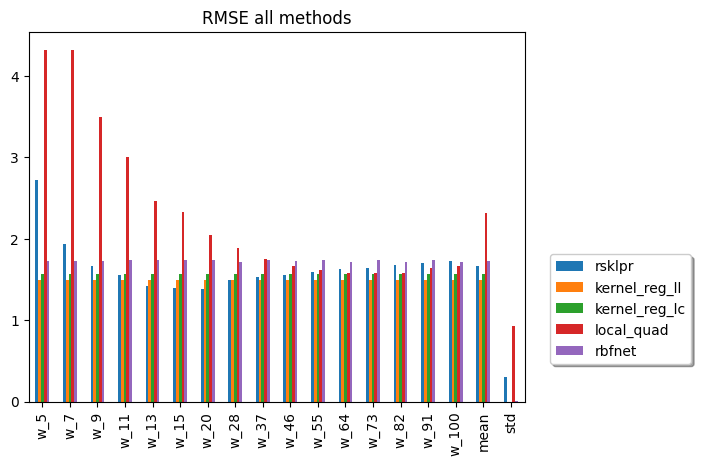

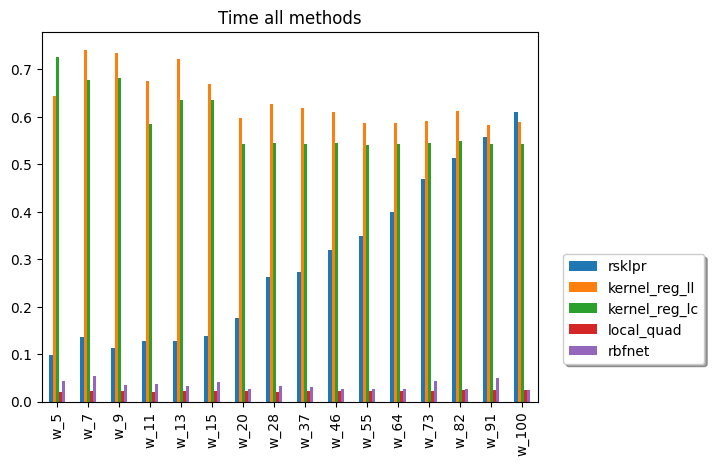

In [12]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_1,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1="scott",
    bw2="scott",
    k2="conden",
    methods=methods,
)

In [13]:
best_for_window

method      rmse
w_5    kernel_reg_ll  1.493713
w_7    kernel_reg_ll  1.493713
w_9    kernel_reg_ll  1.493713
w_11   kernel_reg_ll  1.493713
w_13          rsklpr  1.422007
w_15          rsklpr  1.394887
w_20          rsklpr  1.379441
w_28          rsklpr  1.489565
w_37   kernel_reg_ll  1.493713
w_46   kernel_reg_ll  1.493713
w_55   kernel_reg_ll  1.493713
w_64   kernel_reg_ll  1.493713
w_73   kernel_reg_ll  1.493713
w_82   kernel_reg_ll  1.493713
w_91   kernel_reg_ll  1.493713
w_100  kernel_reg_ll  1.493713

In [14]:
worst_for_window

method      rmse
w_5    local_quad  4.321524
w_7    local_quad  4.321524
w_9    local_quad  3.495176
w_11   local_quad  3.002379
w_13   local_quad  2.463215
w_15   local_quad  2.330156
w_20   local_quad  2.048741
w_28   local_quad  1.882351
w_37   local_quad  1.750903
w_46       rbfnet  1.726633
w_55       rbfnet  1.732928
w_64       rbfnet  1.717201
w_73       rbfnet  1.732693
w_82       rbfnet  1.718220
w_91       rbfnet  1.732424
w_100      rsklpr  1.721438

## Plane 2

### Mild noise

Best performing method is local_quad for size_neighborhood w_37


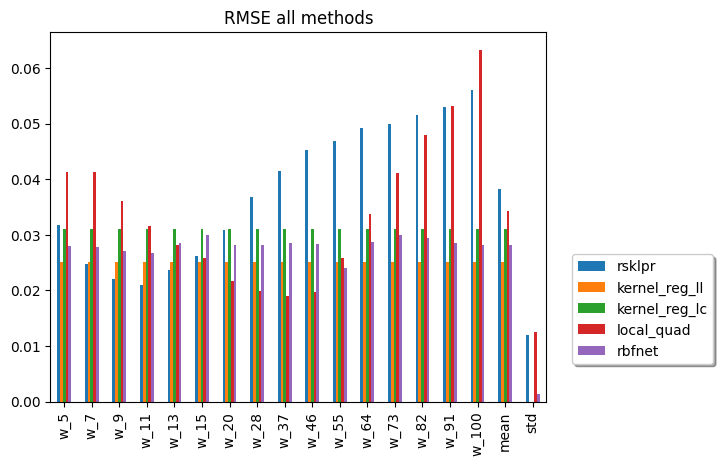

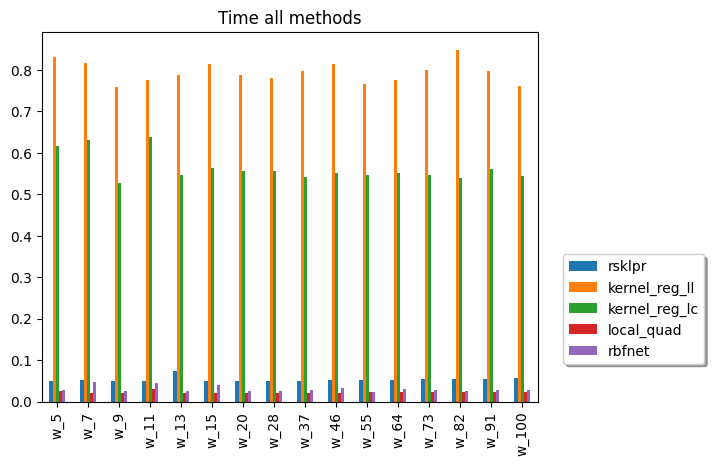

In [15]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_2,
    noise_ratio=mild_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [16]:
best_for_window

method      rmse
w_5    kernel_reg_ll  0.025032
w_7           rsklpr  0.024795
w_9           rsklpr  0.022012
w_11          rsklpr  0.021014
w_13          rsklpr  0.023710
w_15   kernel_reg_ll  0.025032
w_20      local_quad  0.021657
w_28      local_quad  0.019932
w_37      local_quad  0.019032
w_46      local_quad  0.019624
w_55          rbfnet  0.024012
w_64   kernel_reg_ll  0.025032
w_73   kernel_reg_ll  0.025032
w_82   kernel_reg_ll  0.025032
w_91   kernel_reg_ll  0.025032
w_100  kernel_reg_ll  0.025032

In [17]:
worst_for_window

method      rmse
w_5       local_quad  0.041300
w_7       local_quad  0.041300
w_9       local_quad  0.036140
w_11      local_quad  0.031485
w_13   kernel_reg_lc  0.030978
w_15   kernel_reg_lc  0.030978
w_20   kernel_reg_lc  0.030978
w_28          rsklpr  0.036835
w_37          rsklpr  0.041483
w_46          rsklpr  0.045163
w_55          rsklpr  0.046832
w_64          rsklpr  0.049128
w_73          rsklpr  0.049948
w_82          rsklpr  0.051575
w_91      local_quad  0.053085
w_100     local_quad  0.063315

### Medium noise

Best performing method is rbfnet for size_neighborhood w_82


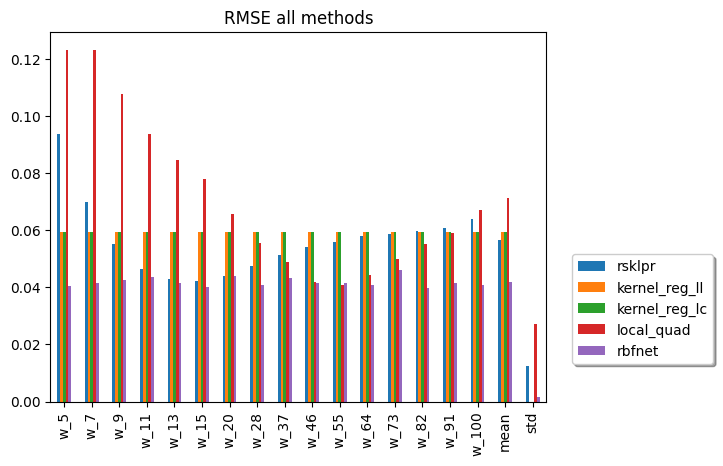

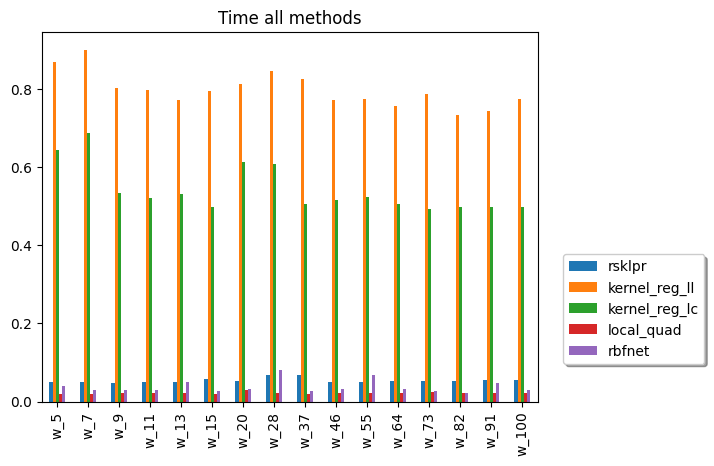

In [18]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_2,
    noise_ratio=medium_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [19]:
best_for_window

method      rmse
w_5        rbfnet  0.040426
w_7        rbfnet  0.041460
w_9        rbfnet  0.042521
w_11       rbfnet  0.043633
w_13       rbfnet  0.041467
w_15       rbfnet  0.040143
w_20       rsklpr  0.044061
w_28       rbfnet  0.040721
w_37       rbfnet  0.043443
w_46       rbfnet  0.041459
w_55   local_quad  0.040850
w_64       rbfnet  0.040851
w_73       rbfnet  0.046270
w_82       rbfnet  0.039956
w_91       rbfnet  0.041460
w_100      rbfnet  0.040831

In [20]:
worst_for_window

method      rmse
w_5       local_quad  0.123405
w_7       local_quad  0.123405
w_9       local_quad  0.107820
w_11      local_quad  0.093876
w_13      local_quad  0.084664
w_15      local_quad  0.077887
w_20      local_quad  0.065816
w_28   kernel_reg_ll  0.059548
w_37   kernel_reg_ll  0.059548
w_46   kernel_reg_ll  0.059548
w_55   kernel_reg_ll  0.059548
w_64   kernel_reg_ll  0.059548
w_73   kernel_reg_ll  0.059548
w_82          rsklpr  0.059725
w_91          rsklpr  0.060897
w_100     local_quad  0.067108

### High noise

Best performing method is rsklpr for size_neighborhood w_20


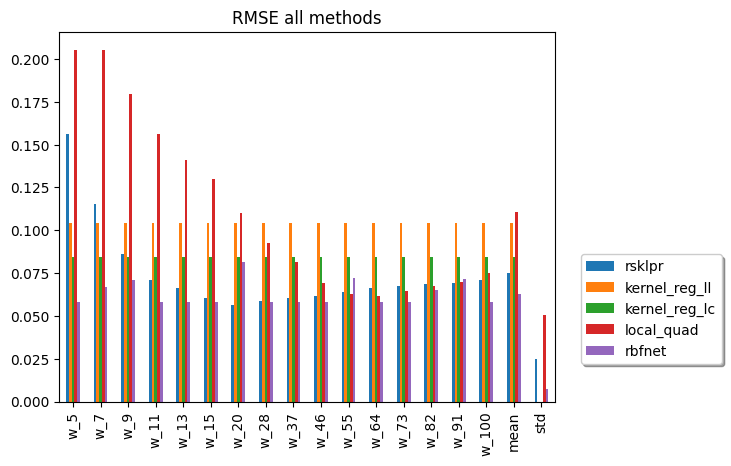

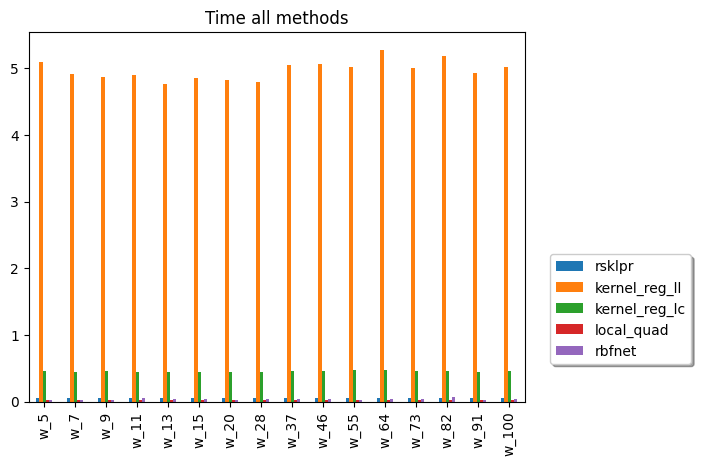

In [21]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_2,
    noise_ratio=high_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [22]:
best_for_window

method      rmse
w_5        rbfnet  0.057983
w_7        rbfnet  0.067030
w_9        rbfnet  0.070755
w_11       rbfnet  0.057988
w_13       rbfnet  0.057989
w_15       rbfnet  0.057993
w_20       rsklpr  0.056421
w_28       rbfnet  0.057984
w_37       rbfnet  0.057999
w_46       rbfnet  0.058005
w_55   local_quad  0.062632
w_64       rbfnet  0.057941
w_73       rbfnet  0.057994
w_82       rbfnet  0.064873
w_91       rsklpr  0.069117
w_100      rbfnet  0.057864

In [23]:
worst_for_window

method      rmse
w_5       local_quad  0.205512
w_7       local_quad  0.205512
w_9       local_quad  0.179502
w_11      local_quad  0.156273
w_13      local_quad  0.141151
w_15      local_quad  0.130002
w_20      local_quad  0.110176
w_28   kernel_reg_ll  0.104457
w_37   kernel_reg_ll  0.104457
w_46   kernel_reg_ll  0.104457
w_55   kernel_reg_ll  0.104457
w_64   kernel_reg_ll  0.104457
w_73   kernel_reg_ll  0.104457
w_82   kernel_reg_ll  0.104457
w_91   kernel_reg_ll  0.104457
w_100  kernel_reg_ll  0.104457

### Extreme noise

Best performing method is rsklpr for size_neighborhood w_37


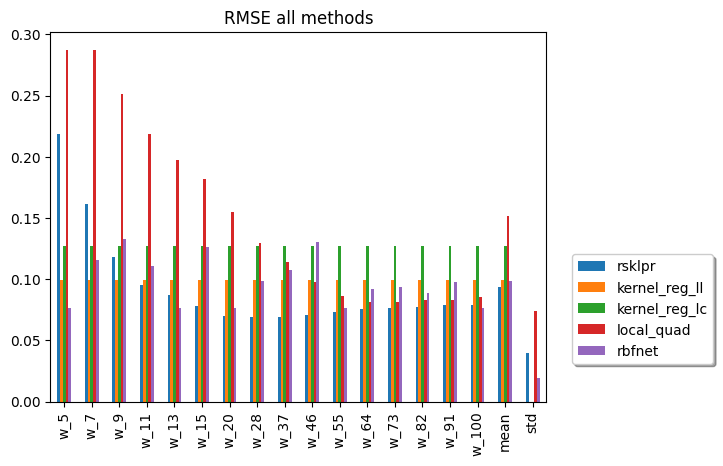

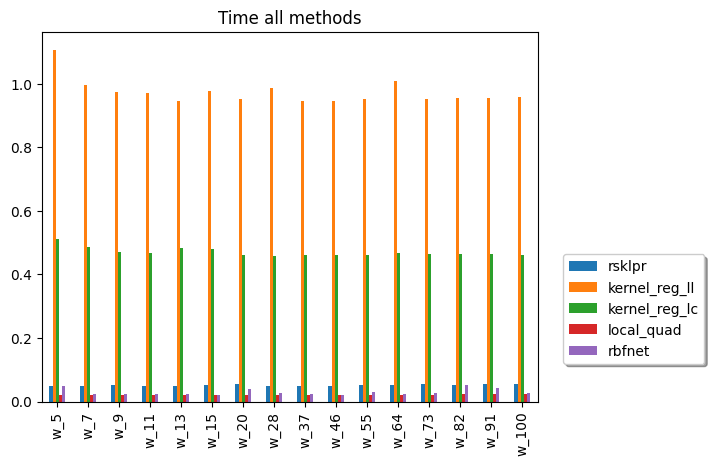

In [24]:
best_for_window, worst_for_window = run_increasing_size_neighborhoods_experiments(
    data_provider=benchmark_plane_2,
    noise_ratio=extreme_noise_ratio,
    hetero=hetero,
    num_points=num_points,
    size_neighborhoods=size_neighborhoods,
    bw1=bw1_f,
    bw2="scott",
    k2="joint",
    methods=methods,
)

In [25]:
best_for_window

method      rmse
w_5           rbfnet  0.076342
w_7    kernel_reg_ll  0.099211
w_9    kernel_reg_ll  0.099211
w_11          rsklpr  0.095002
w_13          rbfnet  0.076344
w_15          rsklpr  0.077823
w_20          rsklpr  0.069781
w_28          rsklpr  0.069167
w_37          rsklpr  0.068934
w_46          rsklpr  0.070612
w_55          rsklpr  0.073263
w_64          rsklpr  0.075992
w_73          rsklpr  0.076538
w_82          rsklpr  0.077578
w_91          rsklpr  0.078476
w_100         rbfnet  0.076348

In [26]:
worst_for_window

method      rmse
w_5       local_quad  0.287618
w_7       local_quad  0.287618
w_9       local_quad  0.251185
w_11      local_quad  0.218670
w_13      local_quad  0.197641
w_15      local_quad  0.182122
w_20      local_quad  0.154565
w_28      local_quad  0.129480
w_37   kernel_reg_lc  0.127087
w_46          rbfnet  0.130227
w_55   kernel_reg_lc  0.127087
w_64   kernel_reg_lc  0.127087
w_73   kernel_reg_lc  0.127087
w_82   kernel_reg_lc  0.127087
w_91   kernel_reg_lc  0.127087
w_100  kernel_reg_lc  0.127087